In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv', dtype=str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null object
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null object
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null object
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: object(12)
memory usage: 83.7+ KB


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [7]:
df[['Age','Fare']] = df[['Age','Fare']].astype(float)
df[['Survived','SibSp','Parch']] = df[['Survived','SibSp','Parch']].astypee(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null object
Survived       891 non-null int32
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int32
Parch          891 non-null int32
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int32(3), object(7)
memory usage: 73.2+ KB


In [9]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891.000000,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891,NaN,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,566,NaN,3,"Crease, Mr. Ernest James",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,1,NaN,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 결측 : age, cabin, Embarked
# 시각화를 통한 데이터 탐색

In [11]:
def bar_df(colname):
    global df
    surv = df[df['Survived']==1][colname].value_counts()
    dead = df[df['Survived']==0][colname].value_counts()
    tt = pd.DataFrame([surv,dead], index = ['Survived','dead'])
    return tt

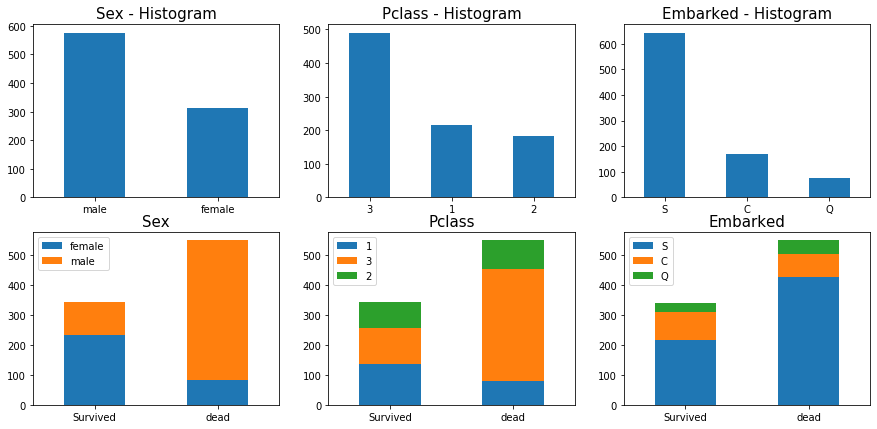

In [36]:
eda_cols = ['Sex', 'Pclass','Embarked']
fig = plt.figure(figsize=(15,7))

for i in range(len(eda_cols)):
    ax1 = plt.subplot(2,len(eda_cols),i+1) #위치에 대한 표현인듯
    df[eda_cols[i]].value_counts().plot(kind='bar',ax=ax1) #위에꺼 세개를 그림
    plt.title(eda_cols[i] + " - Histogram", fontsize=15) #표제를 씀
    plt.xticks(rotation=0) #x축 라벨 회전
    
    ax2 = plt.subplot(2,len(eda_cols),i+4)
    bar_df(eda_cols[i]).plot(kind='bar', stacked = True, ax=ax2)
    plt.title(eda_cols[i], fontsize=15)
    plt.xticks(rotation=0)
    
plt.show()